In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from plotting import plot, plot_workers, plot_speedup
from jupyterthemes import jtplot

client,w=start_client(33)
client

<Client: 'tcp://127.0.0.1:43703' processes=33 threads=33, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:43703 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 33 Cores: 33 Memory: 33.69 GB


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [2]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.8 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0,
    "weights":[0.7,0.3],
    "random_state":17
}
threshold=0.03

chunks=100
e_array=[0.3]
e=0.3
sizes=[30000,50000,100000,150000,200000,300000]
minibatches=[10,50,100]
new="no" #choose if you want to recreate the dataset

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [3]:
# 3 different e
new="no"
dataset_params["weights"]=[0.5,0.5]
Acc_threshold=[]
Rounds_threshold=[]
Time_threshold=[]
total_time_list=[]
total_acc_list=[]
labels=[[]]

for i in range(15) :
    Acc,time_l,total_rounds,total_time,total_acc=main(client,w,new,dataset_params,e,chunks,minibatches[0])
    new="no"
    total_time_list.append(total_time)
    total_acc_list.append(total_acc)
    Acc_threshold.append(Acc)
    Rounds_threshold.append(total_rounds)
    Time_threshold.append(time_l)
    time.sleep(2)

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.3212156295776367]
Accuracy: 92.340000
[2, 32, 0.7492954730987549]
Accuracy: 93.086667
[1, 32, 1.1267738342285156]
Accuracy: 93.100000
[1, 32, 1.357787847518921]
Accuracy: 93.473333
[1, 13, 1.6253268718719482]
Accuracy: 93.513333
[1, 0, 1.9480299949645996]
Accuracy: 93.913333

**
 Pass 0 completed
**

[1, 0, 0.34732508659362793]
Accuracy: 94.253333

**
 Pass 1 completed
**

Total time [1.9480299949645996, 0.34732508659362793]
-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.2201213836669922]
Accuracy: 91.053333
[2, 32, 0.6227452754974365]
Accuracy: 91.906667
[1, 31, 0.8984923362731934]
Accuracy: 93.526667
[1, 0, 1.1937100887298584]
Accuracy: 93.913333

**
 Pass 0 completed


[1, 32, 0.8814003467559814]
Accuracy: 93.466667
[2, 0, 1.4401695728302002]
Accuracy: 93.946667

**
 Pass 0 completed
**

[1, 0, 0.3909592628479004]
Accuracy: 94.173333

**
 Pass 1 completed
**

Total time [1.4401695728302002, 0.3909592628479004]
-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.3
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.2072453498840332]
Accuracy: 91.600000
[2, 32, 0.5415363311767578]
Accuracy: 92.793333
[2, 29, 0.8761947154998779]
Accuracy: 93.393333
[1, 25, 1.1366856098175049]
Accuracy: 93.813333
[1, 18, 1.3875036239624023]
Accuracy: 93.520000
[1, 2, 1.596992015838623]
Accuracy: 90.320000
[1, 0, 1.7963290214538574]
Accuracy: 89.800000

**
 Pass 0 completed
**

[1, 0, 0.356386661529541]
Accuracy: 93.886667

**
 Pass 1 completed
**

Total time [1.7963290214538574, 0.356386661529541]


In [4]:
total_time_mean=[sum(suby) / len(suby) for suby in zip(*total_time_list)] 
total_acc_mean=[sum(suby) / len(suby) for suby in zip(*total_acc_list)] 
name1="np_arrays/total/total_time"+str(len(w)-1)
name2="np_arrays/total/total_acc"+str(len(w)-1)
name3="np_arrays/total/total_time_mean"+str(len(w)-1)
name4="np_arrays/total/total_acc_mean"+str(len(w)-1)
np.save(name1,total_time_list)
np.save(name2,total_acc_list)
np.save(name3,total_time_mean)
np.save(name4,total_acc_mean)
total_time_list,total_time_mean, total_acc_list, total_acc_mean

([[1.9480299949645996, 0.34732508659362793],
  [1.1937100887298584, 0.34081482887268066],
  [1.5912690162658691, 0.3368551731109619],
  [1.431591510772705, 0.4770469665527344],
  [1.846264362335205, 0.3607304096221924],
  [1.2312023639678955, 0.35802745819091797],
  [0.22164177894592285, 1.590954065322876],
  [1.9773509502410889, 0.4078247547149658],
  [1.7770640850067139, 0.36369967460632324],
  [1.8474767208099365, 0.34238433837890625],
  [1.4075994491577148, 0.3239176273345947],
  [2.0970418453216553, 0.33890438079833984],
  [1.8058280944824219, 0.3376035690307617],
  [1.4401695728302002, 0.3909592628479004],
  [1.7963290214538574, 0.356386661529541]],
 [1.574171257019043, 0.4448956171671549],
 [[0.9391333333333334, 0.9425333333333333],
  [0.9391333333333334, 0.9432666666666667],
  [0.9316666666666666, 0.9418666666666666],
  [0.9388, 0.9406666666666667],
  [0.9046666666666666, 0.9412666666666667],
  [0.9369333333333333, 0.9419333333333333],
  [0.9113333333333333, 0.9343333333333333]

In [5]:
# centr=client.submit(real_partial,minibatches[1],workers=w[0])
# time_centr,Acc_real1,f_acc=centr.result()
# time_centr,Acc_real1,f_acc=real_partial(10)
# len_real1=np.array([i for i in range(len(Acc_real1))])
# labels='centralized'
# np.save('np_arrays/time_centr',time_centr)
# np.save('np_arrays/Acc_real1',Acc_real1)
# np.save('np_arrays/f_acc',f_acc)

Interquartile range is 0.1544952392578125
Interquartile range is 0.04546773433685303
Interquartile range is 0.04616666666666669
Interquartile range is 0.002066666666666661
Interquartile range is 0.12549877166748047
Interquartile range is 0.027486443519592285
Interquartile range is 0.017733333333333268
Interquartile range is 0.0015666666666667162
Interquartile range is 0.5993993282318115
Interquartile range is 0.007676482200622559
Interquartile range is 0.014733333333333376
Interquartile range is 0.0023333333333332984
Interquartile range is 0.3299180269241333
Interquartile range is 0.022060632705688477
Interquartile range is 0.0049000000000000155
Interquartile range is 0.0012333333333333085
Interquartile range is 0.3802790641784668
Interquartile range is 0.032460570335388184
Interquartile range is 0.015999999999999903
Interquartile range is 0.0017000000000000348
Interquartile range is 0.4914848804473877
Interquartile range is 0.016781091690063477
Interquartile range is 0.007466666666666

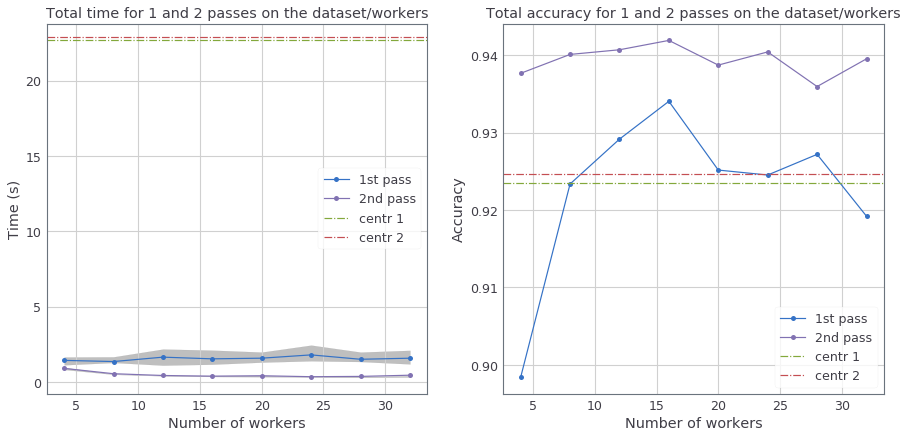

No handles with labels found to put in legend.


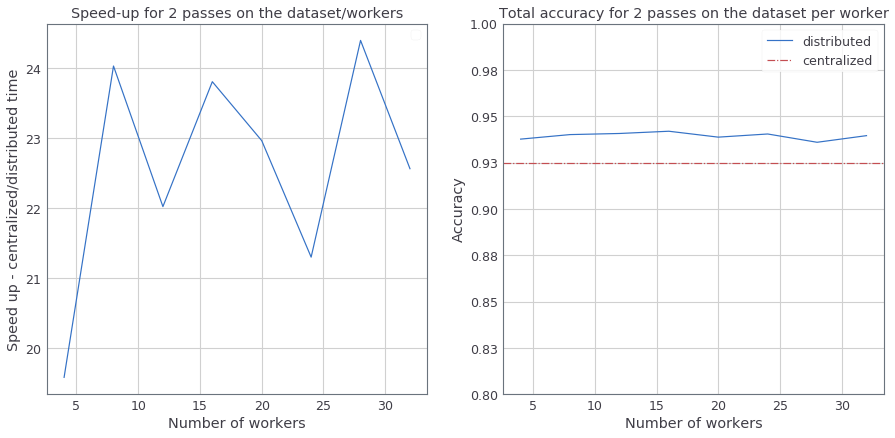

In [6]:
time_centr=np.load('np_arrays/time_centr.npy')
f_acc=np.load('np_arrays/f_acc.npy')
plot_workers([4,8,12,16,20,24,28,32],time_centr,f_acc)
plot_speedup([4,8,12,16,20,24,28,32],time_centr,f_acc)

In [7]:
from IPython.display import Audio, display
display(Audio(url='http://peal.io/download/5e289.wav', autoplay=True))
# http://peal.io/download/mr5xx.wav

In [8]:
# Acc_minibatch=[]
# Rounds_minibatch=[]
# Time_minibatch=[]
# e=0.2
# for i in minibatches :
#     minibatch=i
#     Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,e,chunks,minibatch)
#     new="no"
#     Acc_minibatch.append(Acc)
#     Rounds_minibatch.append(n_rounds)
#     Time_minibatch.append(time_stamps)
#     time.sleep(5)

In [9]:
# name="Plots/Minibatch_4x_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minib_"+str(minibatches)+".png"
# plot(l1,l2,Acc_minibatch,Rounds_minibatch,Time_minibatch,minibatches,labels,name,'minibatches')

### Save results

In [10]:
# f = open("result.txt", "a")
# f.writelines(["\n\n==========================================================================="])
# f.writelines(["\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
#               ,str(minibatches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
# f.writelines(["\n___________________________________________________________________________"])
# f.writelines(["\nRESULTS:\nAcc_threshold",str(Acc_threshold),"\nRounds_threshold",str(Rounds_threshold),
#              "\nTime_threshold",str(Time_threshold),"\nlen_real1",str(len_real1),"\nAcc_real1",str(Acc_real1)])
# f.close()

### Shutdown client

In [11]:
client.close()
client.shutdown()